In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = fetch_california_housing()
X = data.data
y = data.target


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # output layer


C:\Users\Netra\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [8]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5351 - mae: 0.7020 - val_loss: 0.4119 - val_mae: 0.4524
Epoch 2/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3838 - mae: 0.4423 - val_loss: 0.4197 - val_mae: 0.4417
Epoch 3/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3612 - mae: 0.4224 - val_loss: 0.3962 - val_mae: 0.4346
Epoch 4/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3563 - mae: 0.4169 - val_loss: 0.3570 - val_mae: 0.4061
Epoch 5/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3380 - mae: 0.4035 - val_loss: 0.3788 - val_mae: 0.4221
Epoch 6/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3269 - mae: 0.3956 - val_loss: 0.3335 - val_mae: 0.4023
Epoch 7/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3096 - mae: 0.3920 - val_loss: 0.3429 - val_mae: 0.3919
Epoch 8/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3136 - mae: 0.3816 - val_loss: 0.3429 - val_mae: 0.4006
Epoch 9/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/

In [9]:
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print("Mean Absolute Error on Test Data:", mae)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2848 - mae: 0.3603
Mean Absolute Error on Test Data: 0.3610498011112213


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


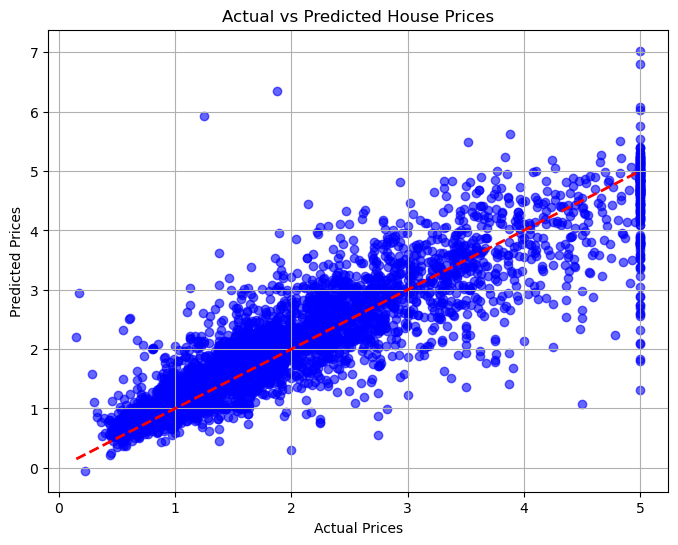

In [10]:
import matplotlib.pyplot as plt

# Predict house prices on the test set
y_pred = model.predict(X_test).flatten()

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
